In [3]:
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

In [5]:
df = pd.read_excel("premiums_rest.xlsx")
print(df.shape)
df['Genetical_Risk'] = 0
df.head()

(29904, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [7]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [9]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [11]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates(inplace=True) ##in case datasets changes and have duplicates value it still be handled
df.duplicated().sum()

0

In [19]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [21]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [23]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.385933,23.364184,20892.303821,0.0
std,13.412657,1.421137,24.740339,6936.813440,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [25]:
numeric_col = df.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

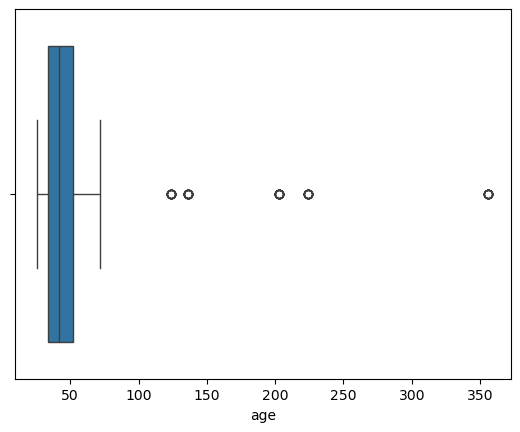

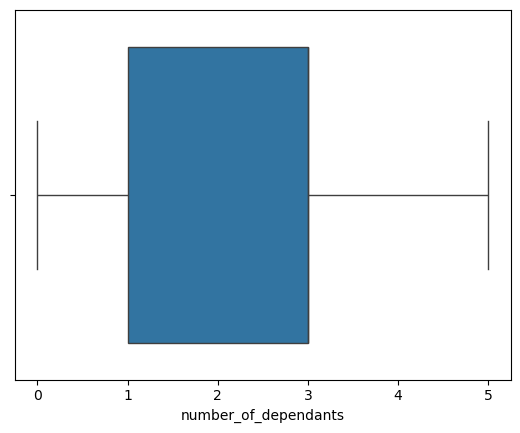

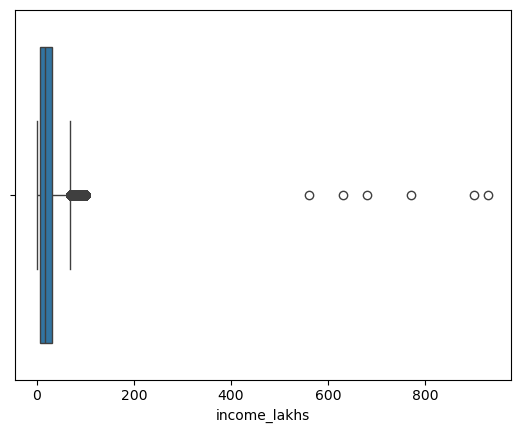

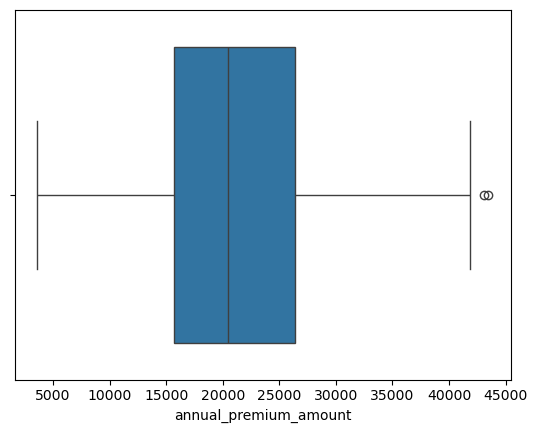

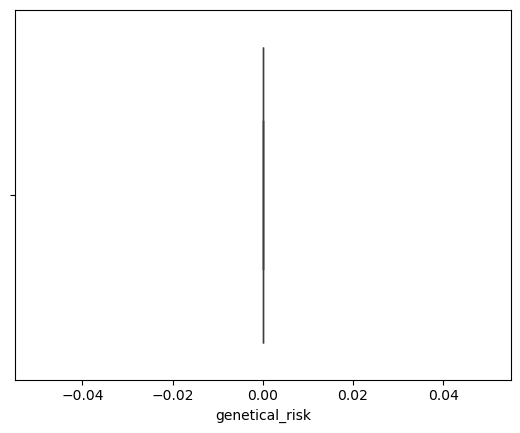

In [27]:
for col in numeric_col:
    sbn.boxplot(x=df[col])
    plt.show()

In [29]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [31]:
df1 = df[df['age']<100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


In [33]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [35]:
get_iqr_bounds(df1.income_lakhs) ## we can use this upper bond here but can use common sense as well for example just use quantile

(-30.5, 69.5)

In [37]:
income_thre = df1['income_lakhs'].quantile(0.999)
income_thre

100.0

In [39]:
df1[df1['income_lakhs']> income_thre].shape

(6, 14)

In [41]:
df2 = df1[df1['income_lakhs']<income_thre].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29754.000000,29754.000000,29754.000000,29754.000000,29754.0
mean,43.097432,2.387679,23.050884,20891.777811,0.0
std,11.043700,1.420724,22.178726,6929.595513,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15698.250000,0.0
50%,42.000000,3.000000,17.000000,20480.000000,0.0
75%,52.000000,3.000000,32.000000,26355.750000,0.0
max,72.000000,5.000000,99.000000,43471.000000,0.0


In [43]:
df2.shape

(29754, 14)

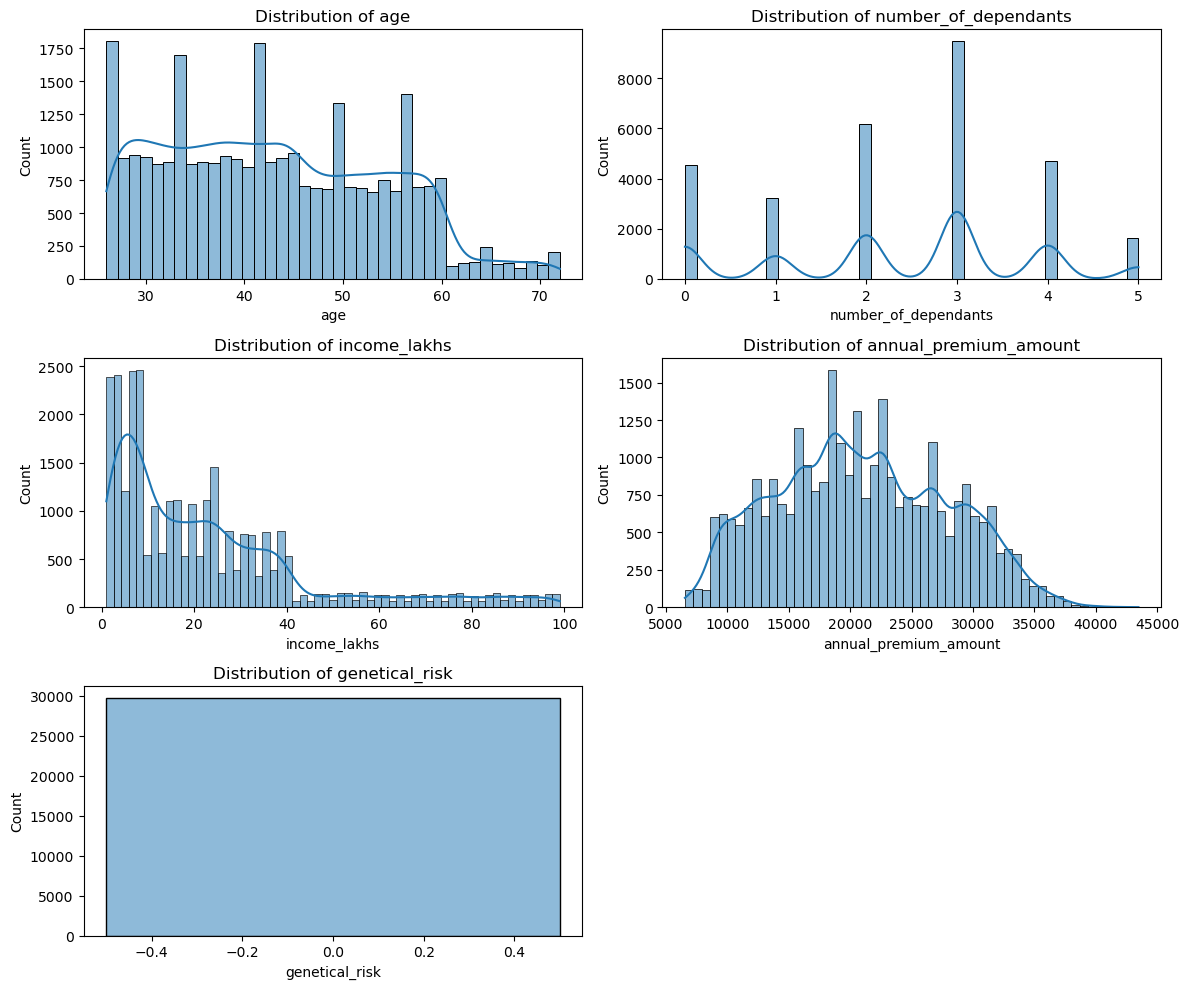

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns = 6 subplots
axes = axes.flatten()

for i, col in enumerate(numeric_col[:5]):  # Use only first 5 columns if more exist
    sbn.histplot(x=df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide the unused 6th plot if only 5 visuals are needed
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

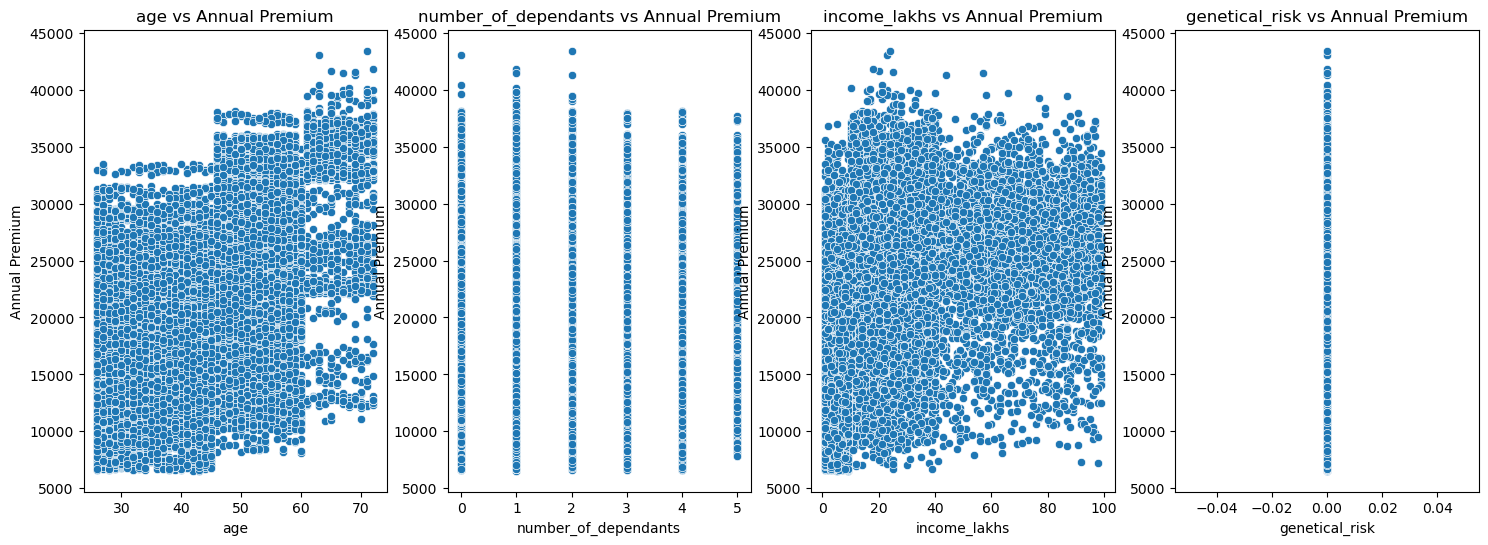

In [47]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs', 'genetical_risk']
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18,6))

for ax, col in zip(axes, numeric_features):
    sbn.scatterplot(x=df2[col], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{col} vs Annual Premium')
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium")

plt.show()

In [49]:
cat_col = df.select_dtypes(['object', 'string']).columns
cat_col

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [51]:
for col in cat_col:
    print(col, df[col].unique())

gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']


In [53]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
}, inplace=True)
df2['smoking_status'].unique()

/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_1750/321161999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [55]:
pct_gender = df2['gender'].value_counts(normalize=True)
pct_gender

gender
Male      0.548968
Female    0.451032
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

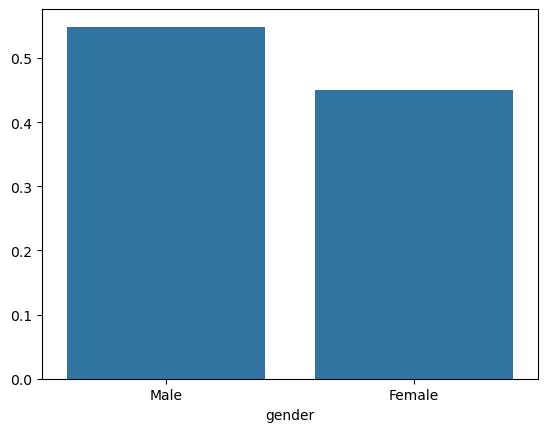

In [57]:
sbn.barplot(x=pct_gender.index, y=pct_gender.values)

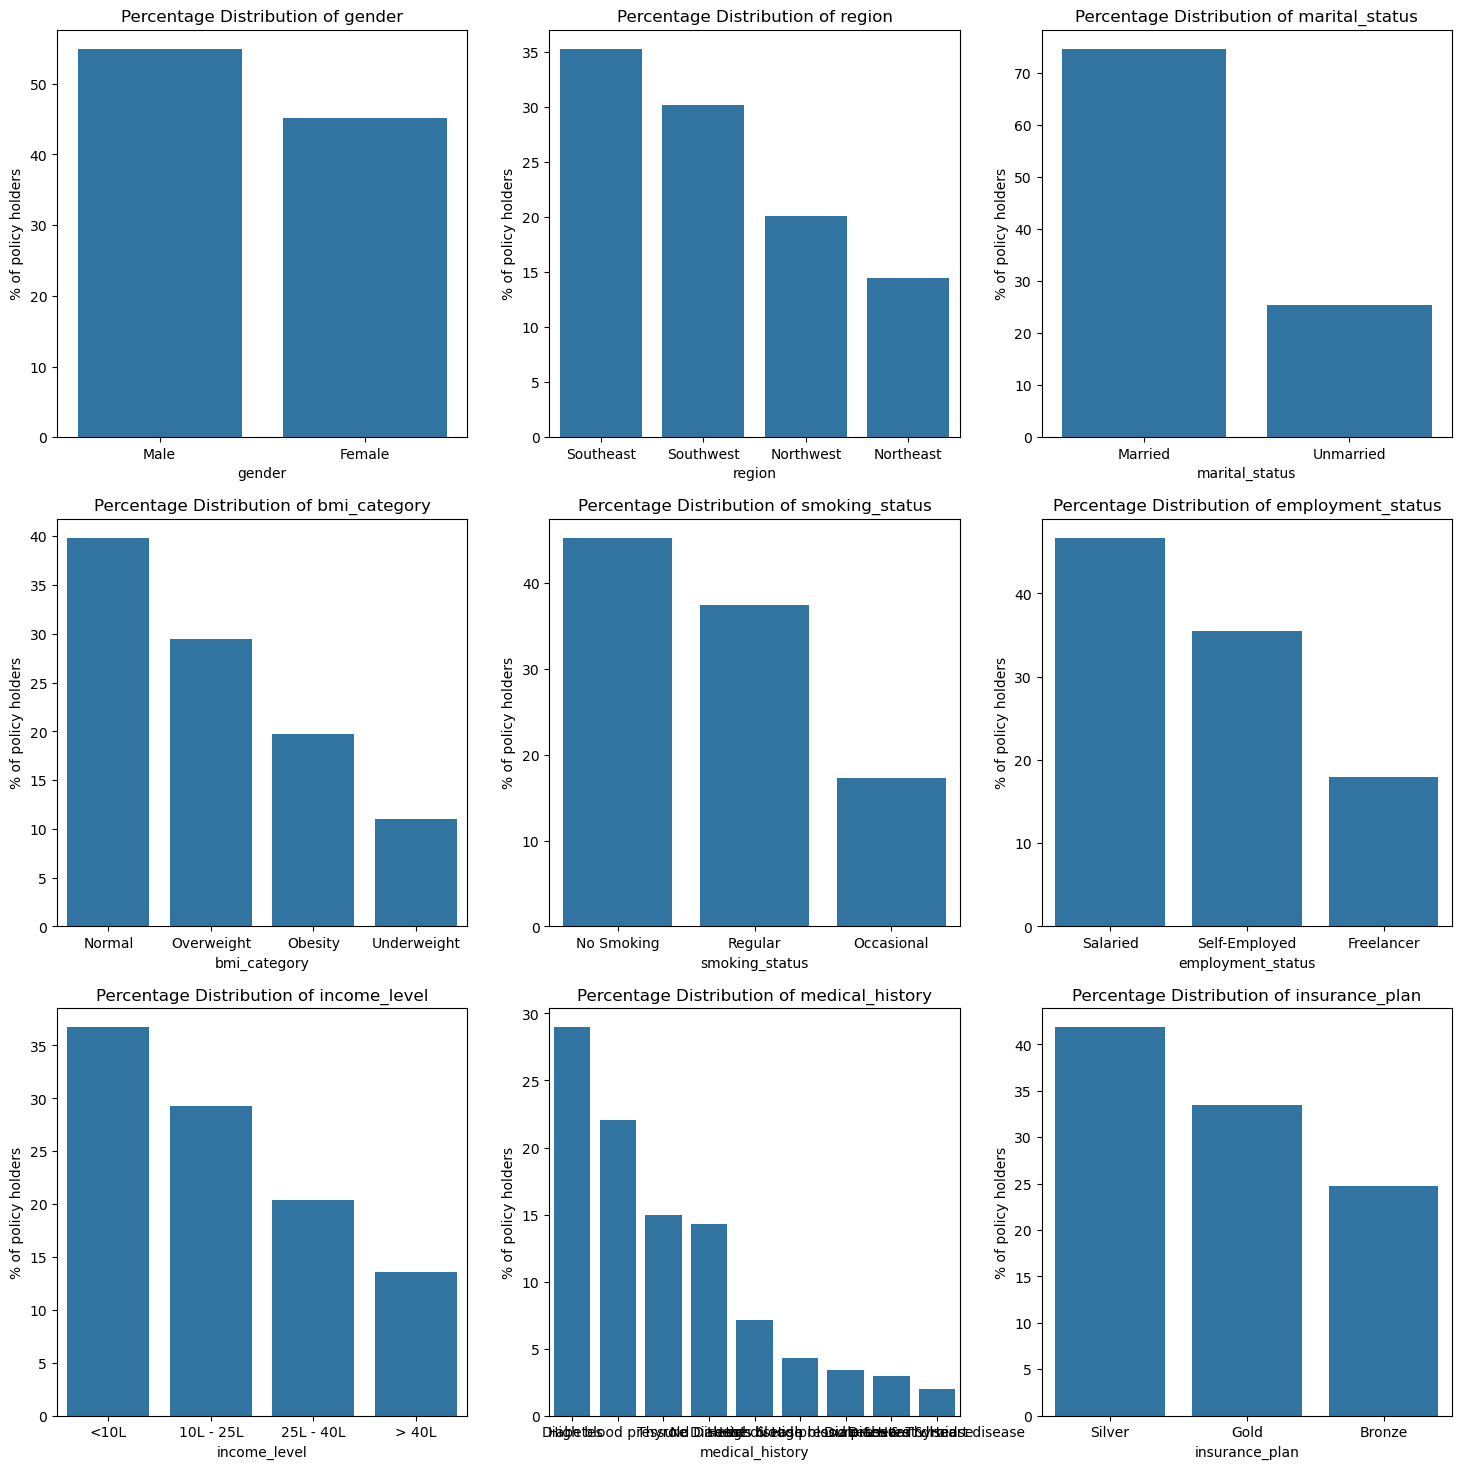

In [59]:
fig, axes = plt.subplots(3, 3, figsize=(18,18))
axes = axes.flatten()

for ax, col in zip(axes, cat_col):
    cat_count = df2[col].value_counts(normalize=True) * 100
    sbn.barplot(x=cat_count.index, y=cat_count.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("% of policy holders")

plt.show()

In [61]:
cross_tab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,211,3231,609


<Axes: xlabel='income_level'>

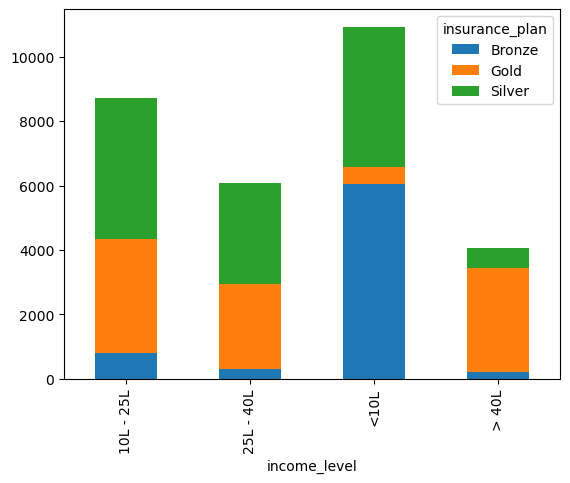

In [63]:
cross_tab.plot(kind="bar", stacked=True)

<Axes: xlabel='insurance_plan', ylabel='income_level'>

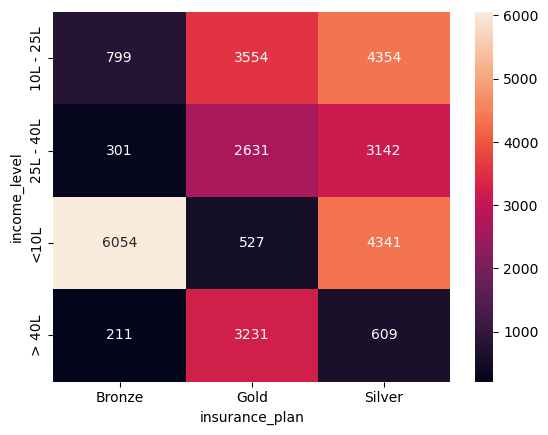

In [65]:
sbn.heatmap(cross_tab, annot=True, fmt='d')

In [67]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [69]:
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

In [71]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,None


In [73]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_1750/3623383084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_1750/3623383084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571


In [75]:
df2.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
9008,40,Male,Northeast,Unmarried,1,Overweight,Regular,Salaried,<10L,2,No Disease,Silver,18119,0,no disease,none,0,0.000000
11146,39,Male,Southeast,Unmarried,1,Overweight,Regular,Salaried,10L - 25L,22,High blood pressure,Silver,20912,0,high blood pressure,none,6,0.428571
21535,30,Female,Southeast,Married,5,Obesity,Regular,Self-Employed,10L - 25L,25,Diabetes,Silver,22051,0,diabetes,none,6,0.428571
4876,58,Male,Southwest,Married,3,Overweight,Occasional,Self-Employed,25L - 40L,28,Heart disease,Silver,25236,0,heart disease,none,8,0.571429
11140,36,Male,Southeast,Married,3,Underweight,No Smoking,Salaried,10L - 25L,22,Thyroid,Silver,16480,0,thyroid,none,5,0.357143
15552,60,Female,Southeast,Married,2,Underweight,No Smoking,Self-Employed,<10L,1,Diabetes,Bronze,11163,0,diabetes,none,6,0.428571
14144,42,Female,Northeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,5,Thyroid,Bronze,9149,0,thyroid,none,5,0.357143
7771,58,Female,Southwest,Married,4,Overweight,Occasional,Self-Employed,25L - 40L,35,Diabetes & Thyroid,Gold,31785,0,diabetes,thyroid,11,0.785714
14385,55,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,10L - 25L,14,High blood pressure,Gold,26437,0,high blood pressure,none,6,0.428571
21994,57,Female,Southeast,Married,3,Overweight,Occasional,Freelancer,10L - 25L,19,High blood pressure,Silver,21459,0,high blood pressure,none,6,0.428571


In [77]:
df2['insurance_plan'] = df2['insurance_plan'].map({
    'Bronze':1,
    'Silver':2,
    'Gold':3
})
df2['insurance_plan'].unique()

array([1, 2, 3])

In [79]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [81]:
df2['income_level'] = df2['income_level'].map({
    '<10L':1,
    '10L - 25L':2,
    '25L - 40L':3,
    '> 40L':4
})
df2['income_level'].unique()

array([1, 2, 4, 3])

In [83]:
nominal_col = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_col, drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [85]:
df4 = df3.drop(['disease1','disease2', 'total_risk_score', 'medical_history'], axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


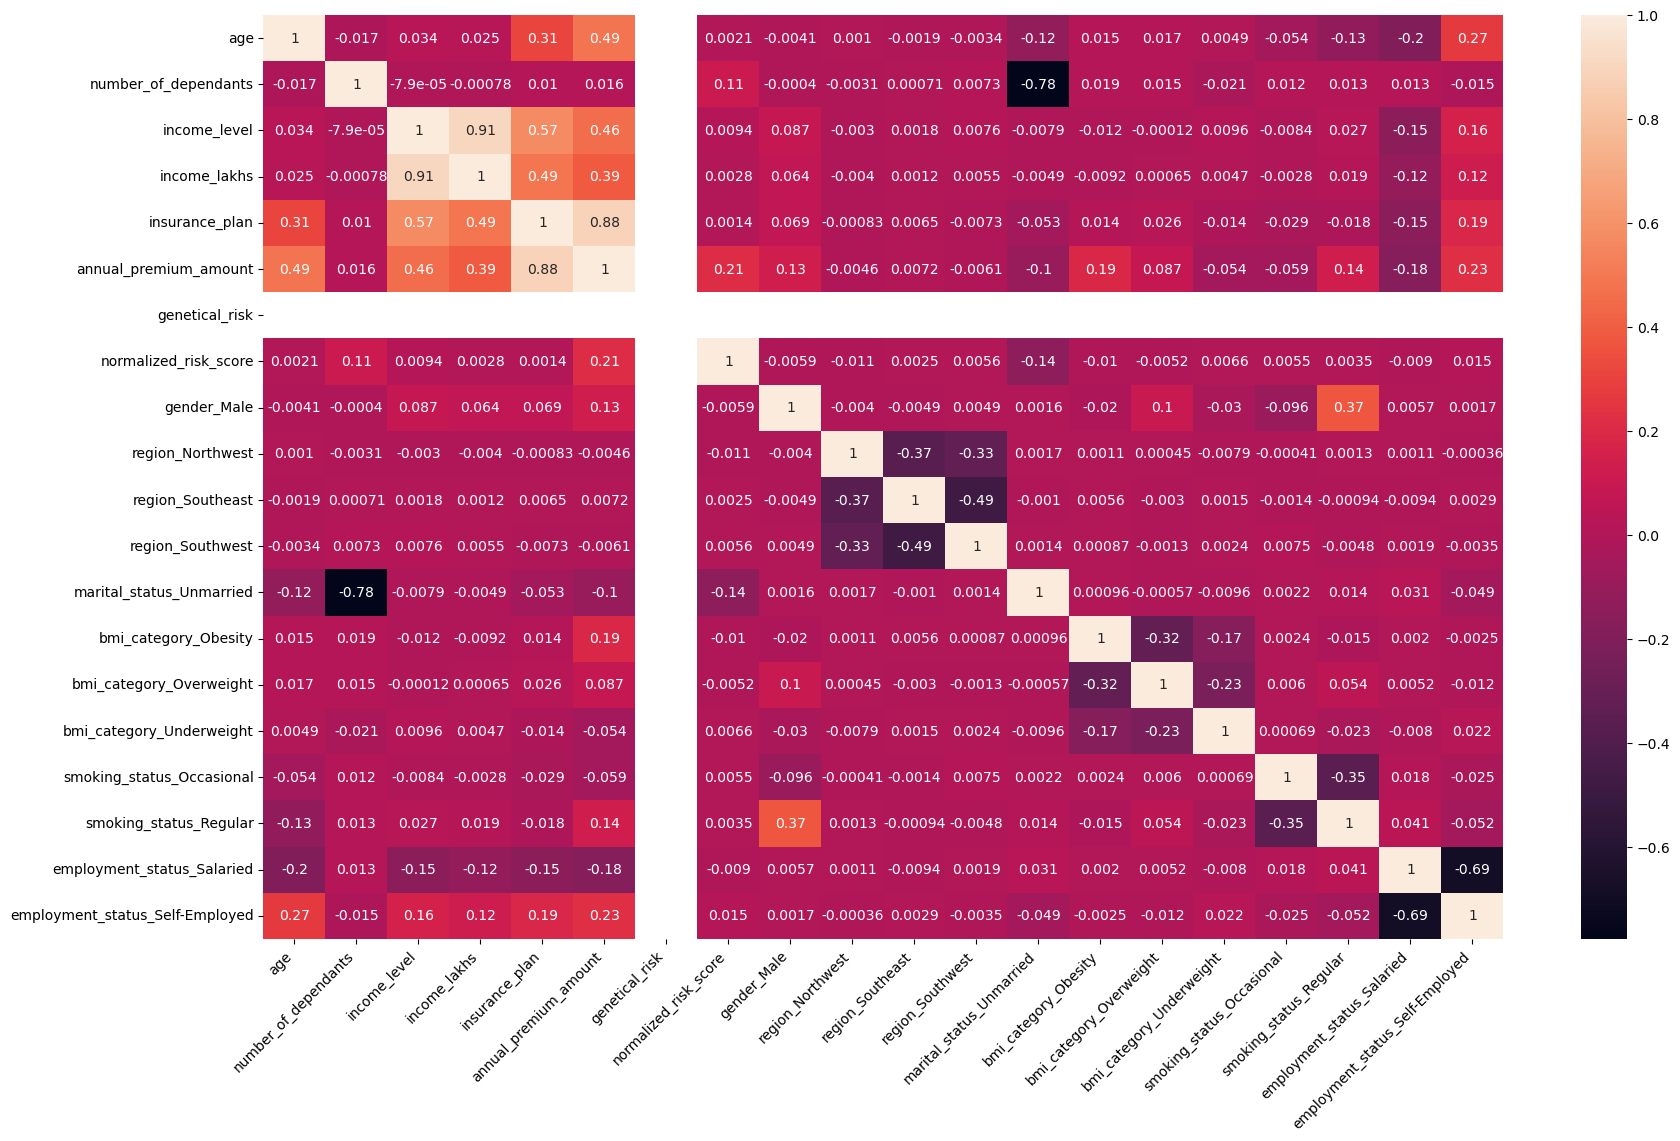

In [87]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sbn.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [89]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [91]:
X = df4.drop('annual_premium_amount', axis=1)
y= df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan', 'genetical_risk']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.0,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000
mean,0.371683,0.477536,0.369788,0.225009,0.543322,0.0,0.426404,0.548968,0.200746,0.352726,0.301875,0.253378,0.196982,0.294918,0.110103,0.173254,0.374605,0.466189,0.354272
std,0.240080,0.284145,0.350221,0.226314,0.378885,0.0,0.240132,0.497605,0.400565,0.477826,0.459079,0.434953,0.397725,0.456014,0.313023,0.378473,0.484029,0.498864,0.478300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.061224,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.163265,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.316327,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [95]:
calculate_vif(X)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.924740
1,number_of_dependants,6.276728
2,income_level,14.063416
3,income_lakhs,11.408527
4,insurance_plan,5.260860
5,genetical_risk,NaN
6,normalized_risk_score,3.809601
7,gender_Male,2.598259
8,region_Northwest,2.123193
9,region_Southeast,2.979784


In [97]:
calculate_vif(X.drop('income_level', axis=1))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.865086
1,number_of_dependants,6.276116
2,income_lakhs,2.690925
3,insurance_plan,4.571804
4,genetical_risk,NaN
5,normalized_risk_score,3.807473
6,gender_Male,2.590560
7,region_Northwest,2.122529
8,region_Southeast,2.978859
9,region_Southwest,2.706927


In [99]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.051020,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.051020,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.193878,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.775510,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.132653,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

print(train_score, test_score)

0.9537747062669479 0.952982332468962


In [103]:
model_lr.coef_, model_lr.intercept_

(array([ 6.96353453e+03, -1.31279216e+03, -7.52016885e+02,  1.48577428e+04,
         2.95585778e-12,  6.02525138e+03,  5.29109471e+01, -4.19355491e+01,
        -4.28778476e+00, -5.58970719e+00, -7.20469122e+02,  3.95823598e+03,
         2.01694333e+03,  6.05139302e+02,  8.29393700e+02,  2.80100338e+03,
        -8.17751554e+01,  2.46364123e+02]),
 5934.164822853347)

In [105]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
number_of_dependants,-1.312792e+03
income_lakhs,-7.520169e+02
marital_status_Unmarried,-7.204691e+02
employment_status_Salaried,-8.177516e+01
region_Northwest,-4.193555e+01
region_Southwest,-5.589707e+00
region_Southeast,-4.287785e+00
genetical_risk,2.955858e-12
gender_Male,5.291095e+01
employment_status_Self-Employed,2.463641e+02


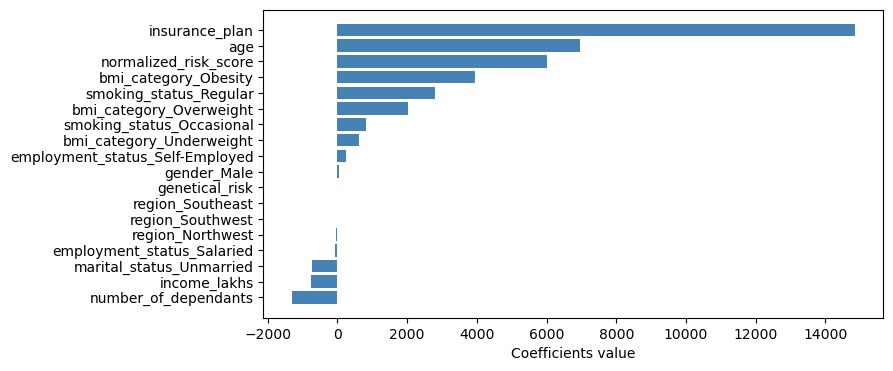

In [107]:
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel("Coefficients value")
plt.show()

In [109]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)
train_score = model_xg.score(X_train, y_train)
test_score = model_xg.score(X_test, y_test)
print(train_score, test_score)

0.9986194968223572 0.9980076551437378


In [111]:
y_pred = model_xg.predict(X_test)

print("R2 Score", r2_score(y_pred, y_test))
print("Mean Square Error", mean_squared_error(y_pred, y_test))
print("Root Square Error", np.sqrt(mean_squared_error(y_pred, y_test)))

R2 Score 0.998008131980896
Mean Square Error 96006.85214561675
Root Square Error 309.84972510172855


In [113]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.997016191482544

In [115]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [117]:
best_model = random_search.best_estimator_

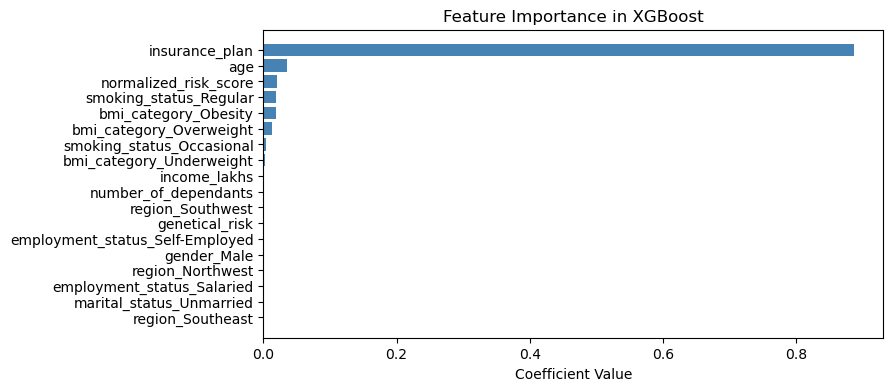

In [119]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [121]:
y_pred = best_model.predict(X_test)
residuals = y_test-y_pred
residual_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residual_pct
})
results_df.head()


,actual,predicted,diff,diff_pct
18272,12370,12079.240234,290.759766,2.350524
24662,11253,11753.384766,-500.384766,-4.446679
1789,30688,30553.044922,134.955078,0.439765
29834,22139,22513.017578,-374.017578,-1.689406
1478,27040,27357.199219,-317.199219,-1.173074


<Axes: xlabel='diff_pct', ylabel='Count'>

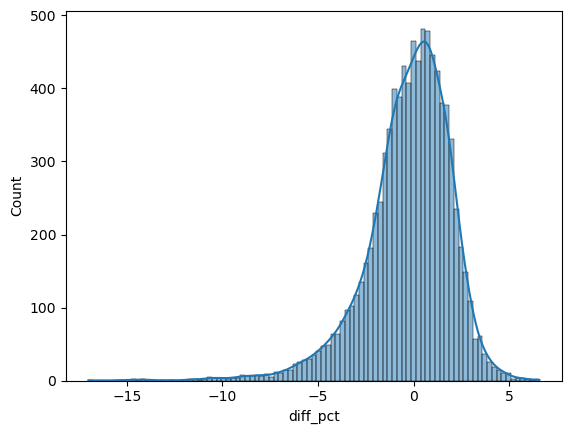

In [123]:
sbn.histplot(results_df['diff_pct'], kde=True)

In [125]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df['diff_pct'])>extreme_error_threshold]
extreme_results_df.shape

(32, 4)

In [127]:
results_df.shape

(8927, 4)

In [131]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

0.35846308950375266

In [133]:
results_df[np.abs(results_df['diff_pct'])>50]

,actual,predicted,diff,diff_pct


In [135]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
6163,0.217391,0.0,0.000000,0.0,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,0,0
14728,0.413043,0.0,0.061224,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,0,1
1549,0.065217,0.8,0.020408,0.0,0.0,0.428571,1,0,1,0,0,0,0,0,0,0,1,0
9756,0.326087,0.4,0.061224,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
29165,0.195652,0.8,0.020408,0.0,0.0,0.428571,0,1,0,0,0,0,0,0,0,0,1,0


In [137]:
col_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

In [139]:
from joblib import dump
scale_with_cols={
    'scaler': scaler,
    'scaler_to_col': col_to_scale
}
dump(best_model, 'artifacts/model_rest.joblib')
dump(scale_with_cols, 'artifacts/scaler_rest.joblib')

['artifacts/scaler_rest.joblib']